### Assignment-02

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/infosys_internship_2025/US_Accidents.csv'


Mounted at /content/drive


In [3]:
import pandas as pd

# Select only required columns
cols = ['City', 'State', 'Weather_Condition', 'Start_Time', 'End_Time', 'Severity']
df = pd.read_csv(file_path, usecols=cols, nrows=100000)

print(df.head())
print(df.info())

   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

  Weather_Condition  
0        Light Rain  
1        Light Rain  
2          Overcast  
3     Mostly Cloudy  
4     Mostly Cloudy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Severity           100000 non-null  int64 
 1   Start_Time         100000 non-null  object
 2   End_Time           100000 non-null  object
 3   City               99999 non-null   object
 4   Sta

1. What is the distribution of accident severity levels?

Severity
2    55.02
3    44.84
1     0.10
4     0.03
Name: proportion, dtype: float64


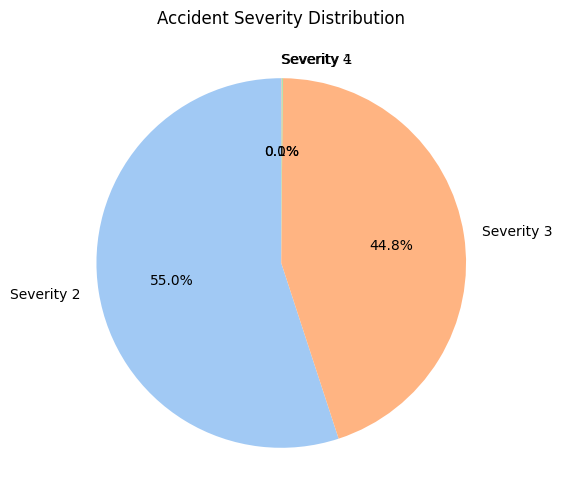

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Percentage of accidents by severity
severity_counts = df['Severity'].value_counts(normalize=True) * 100
print(severity_counts.round(2))

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=[f"Severity {i}" for i in severity_counts.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Accident Severity Distribution")
plt.show()


2. How is the accident frequency distributed by hour of the day?

Hour
0     2240
1     1895
2     1895
3     1507
4     1303
5     1516
6     1378
7     2196
8     3142
9     5291
10    7285
11    7910
12    6219
13    5137
14    5208
15    4707
16    5293
17    5035
18    6144
19    6722
20    7404
21    4970
22    3773
23    1830
Name: count, dtype: int64


/tmp/ipython-input-1531243554.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


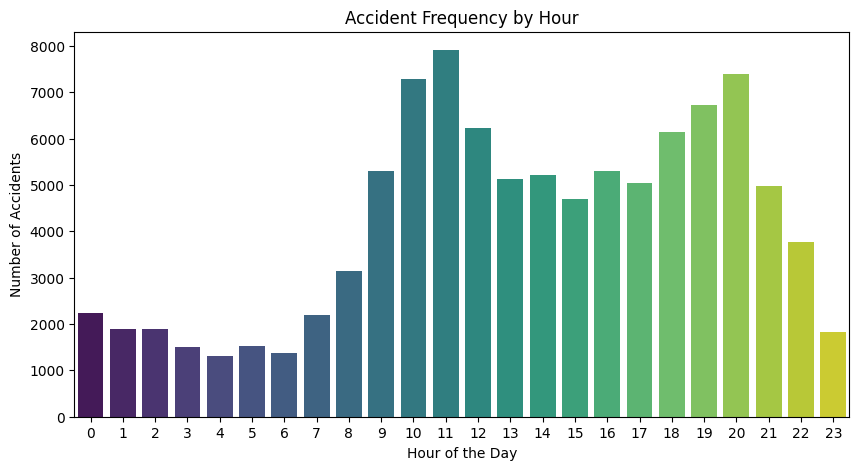

In [5]:
# Ensure Start_Time is datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour
df['Hour'] = df['Start_Time'].dt.hour

# Count accidents per hour
hour_counts = df['Hour'].value_counts().sort_index()
print(hour_counts)

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accident Frequency by Hour")
plt.show()


3. Which days of the week have the highest number of accidents?

DayOfWeek
Thursday     18008
Wednesday    17438
Tuesday      16988
Friday       16393
Monday       15826
Saturday      7994
Sunday        7353
Name: count, dtype: int64


/tmp/ipython-input-1771008117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="magma")


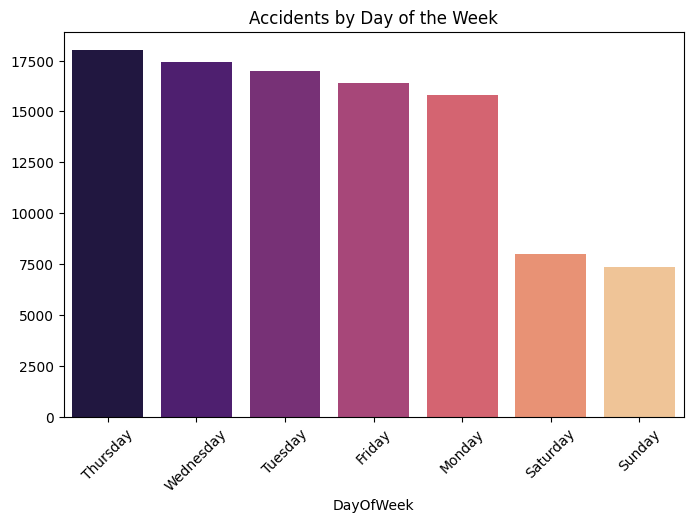

In [6]:
# Extract day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

day_counts = df['DayOfWeek'].value_counts()
print(day_counts)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Accidents by Day of the Week")
plt.show()


4. What are the most common weather conditions during accidents?

Weather_Condition
Clear               57255
Overcast            10255
Mostly Cloudy        8829
Partly Cloudy        8260
Scattered Clouds     5684
Light Rain           3211
Haze                 2097
Fair                 1039
Rain                  829
Heavy Rain            202
Name: count, dtype: int64


/tmp/ipython-input-3400236208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="coolwarm")


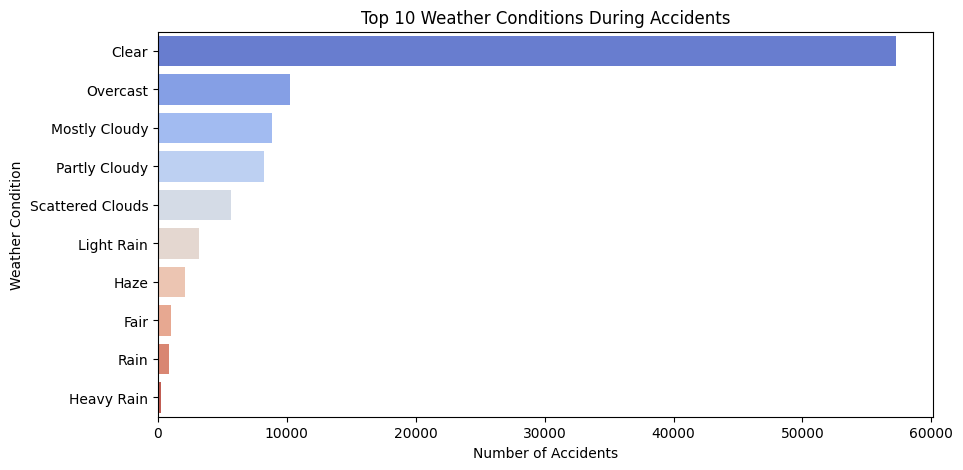

In [7]:
weather_counts = df['Weather_Condition'].value_counts().head(10)  # top 10
print(weather_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="coolwarm")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.title("Top 10 Weather Conditions During Accidents")
plt.show()


5. How to identify columns with missing data and their missing percentage?

In [8]:
missing_percent = df.isnull().mean() * 100
missing_cols = missing_percent[missing_percent > 0]
print(missing_cols)


City                 0.001
Weather_Condition    1.604
dtype: float64


6. How to impute missing numerical values with median?

In [13]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col} has {missing_count} missing values. Imputing with median...")
        df[col] = df[col].fillna(df[col].median())

# Verify
print("\nMissing values after median imputation:")
print(df[numeric_cols].isnull().sum())


Missing values after median imputation:
Severity    0
Hour        0
dtype: int64


7. How to impute missing categorical values with the mode?

In [12]:
# Check which categorical columns have missing values
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col} has {missing_count} missing values. Imputing with mode...")
        # Fill missing values with the most frequent category
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify
print("\nMissing values after imputation:")
print(df[categorical_cols].isnull().sum())

City has 1 missing values. Imputing with mode...

Missing values after imputation:
End_Time             0
City                 0
State                0
Weather_Condition    0
DayOfWeek            0
dtype: int64


8. How to label encode a categorical column?

In [14]:
from sklearn.preprocessing import LabelEncoder

# Example: encode 'Weather_Condition'
le = LabelEncoder()

# Fit and transform the column
df['Weather_Label'] = le.fit_transform(df['Weather_Condition'])

# Check the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label encoding mapping:\n", mapping)

# Show first few rows
print(df[['Weather_Condition', 'Weather_Label']].head())


Label encoding mapping:
 {'Blowing Dust / Windy': np.int64(0), 'Blowing Sand': np.int64(1), 'Clear': np.int64(2), 'Cloudy': np.int64(3), 'Drizzle': np.int64(4), 'Fair': np.int64(5), 'Fair / Windy': np.int64(6), 'Fog': np.int64(7), 'Hail': np.int64(8), 'Haze': np.int64(9), 'Heavy Drizzle': np.int64(10), 'Heavy Rain': np.int64(11), 'Light Drizzle': np.int64(12), 'Light Freezing Drizzle': np.int64(13), 'Light Freezing Fog': np.int64(14), 'Light Freezing Rain': np.int64(15), 'Light Haze': np.int64(16), 'Light Rain': np.int64(17), 'Light Rain / Windy': np.int64(18), 'Light Rain Shower': np.int64(19), 'Light Rain Showers': np.int64(20), 'Light Rain with Thunder': np.int64(21), 'Light Snow': np.int64(22), 'Light Thunderstorms and Rain': np.int64(23), 'Mist': np.int64(24), 'Mostly Cloudy': np.int64(25), 'Mostly Cloudy / Windy': np.int64(26), 'Overcast': np.int64(27), 'Partly Cloudy': np.int64(28), 'Partly Cloudy / Windy': np.int64(29), 'Patches of Fog': np.int64(30), 'Rain': np.int64(31), 'Rai

9. How to one-hot encode a categorical column?

In [16]:
# Convert boolean one-hot columns to integers
one_hot_cols = df_encoded.filter(like='Weather_').columns
df_encoded[one_hot_cols] = df_encoded[one_hot_cols].astype(int)

# Check first few rows
print(df_encoded[one_hot_cols].head())



   Weather_Label  Weather_Blowing Dust / Windy  Weather_Blowing Sand  \
0             17                             0                     0   
1             17                             0                     0   
2             27                             0                     0   
3             25                             0                     0   
4             25                             0                     0   

   Weather_Clear  Weather_Cloudy  Weather_Drizzle  Weather_Fair  \
0              0               0                0             0   
1              0               0                0             0   
2              0               0                0             0   
3              0               0                0             0   
4              0               0                0             0   

   Weather_Fair / Windy  Weather_Fog  Weather_Hail  ...  \
0                     0            0             0  ...   
1                     0            0          